<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW4_woodenML_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 4 (pro): древесные алгоритмы**

### **Постановка задач**

### **Домашнее задание состоит из двух подзадач:**

**1. В  разделе 1 ваша задача:**
-  реализовать свое решающее дерево
- сравнить его со стандартной имплементацией из sklearn

Функции и классы дерева вы должны оформить в модуль `hw4_code_pro.py`.

**2. В разделе два ваша задача:** решить задачу бинарной классификации при помощи написанного Вами дерева, а также леса из sklearn, а после интерпретировать лучшие модели. Чуть точнее

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT, а также RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**
- Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.
- Неэффективная реализация кода может негативно отразиться на оценке.

### **Формат сдачи:**
Задания сдаются через  anytask. Посылка должна содержать:
* Ноутбук в формате ipynb
* Модуль hw4_code_pro.py


### **Баллы:**

Суммарно за задание можно получить 10 основных баллов и 1 бонусный балло.

Оценка за ДЗ = min{ваш балл, 10}

Мягкий дедлайн: 27 января 23:59

**Продуктивной и интересной вам работы!**


In [1]:
!pip install optuna
!pip install lime
!pip install shap
!pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 16.6 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------------- -------------------- 6.3/12.9 MB 43.1 MB/s eta 0:00:01
   ------------------- -------------------- 6.3/12.9 MB 43.1 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 25.3 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.wh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style='whitegrid')

import psycopg2
import psycopg2.extras

import shap
import lime
import lime.lime_tabular

import optuna

import pickle

import warnings
warnings.filterwarnings('ignore')

# **1. Решающие деревья своими руками (6 баллов)**

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Всего за часть вы можете получить 6 основных баллов и 1 бонусный.

### **Задание 1. (1 балл)**

Реализуйте функцию find_best_split из модуля hw4_code_pro.py

In [2]:
from hw4_code_pro import find_best_split, calculate_binary_gini

In [11]:

# Генерация данных
np.random.seed(42)  # Для воспроизводимости

# Создаем numpy.ndarray из float значений для фичи
feature_values = np.random.rand(50)  # 50 случайных значений от 0 до 1

# Создаем numpy.ndarray из значений классов (0 и 1)
class_values = np.random.randint(0, 2, 50)  # 50 случайных значений 0 и 1

print("Feature values:", feature_values)
print("Class values:", class_values)

Feature values: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446]
Class values: [0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 1]


In [12]:
find_best_split(feature_values, class_values, calculate_binary_gini)

(array([0.02748651, 0.04041947, 0.05226701, 0.0615676 , 0.08136185,
        0.10985517, 0.13076605, 0.14774419, 0.15600658, 0.16327138,
        0.17617455, 0.18261474, 0.18412948, 0.19226412, 0.20600645,
        0.23555955, 0.27500456, 0.29168689, 0.29819345, 0.30442801,
        0.30816242, 0.33903646, 0.37045098, 0.40324257, 0.43604876,
        0.44811124, 0.47562345, 0.50470567, 0.51715123, 0.52241223,
        0.53573336, 0.56956242, 0.59553653, 0.59988675, 0.60432993,
        0.60969887, 0.63718759, 0.67337766, 0.6961528 , 0.72003326,
        0.75858495, 0.79678665, 0.82041999, 0.84930939, 0.88774827,
        0.92910297, 0.94979992, 0.95817317, 0.96777094]),
 array([0.48979592, 0.48      , 0.46978723, 0.45913043, 0.48177778,
        0.49333333, 0.4869103 , 0.495     , 0.4897561 , 0.483     ,
        0.49156177, 0.49666667, 0.49280665, 0.48746032, 0.4807619 ,
        0.47279412, 0.46360071, 0.475     , 0.46614601, 0.47666667,
        0.48499179, 0.4912987 , 0.49571659, 0.49833333, 0.

### **Задание 2. (0.25 балла)**

Загрузите таблицу [students.csv](https://github.com/AnastasiyaMax/MLDS_ml_course_fall21/blob/main/hw/hw5_trees/students.csv). Это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling).

В наборе данных:
- признаки объекта записаны в первых пяти столбцах;
- в последнем записана целевая переменная (класс: 0 или 1).

По этим данным, используя функцию из задания 1, постройте:
- пять кривых "порог — значение критерия Джини" для всех пяти признаков;
- scatter-графики "значение признака — класс" для всех пяти признаков;

In [7]:
df = pd.read_csv('students.csv')

In [8]:
X, y = np.array(df.iloc[:, :-1]), np.array(df.iloc[:, -1])

In [9]:
df.columns[:-1]

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG'], dtype='object')

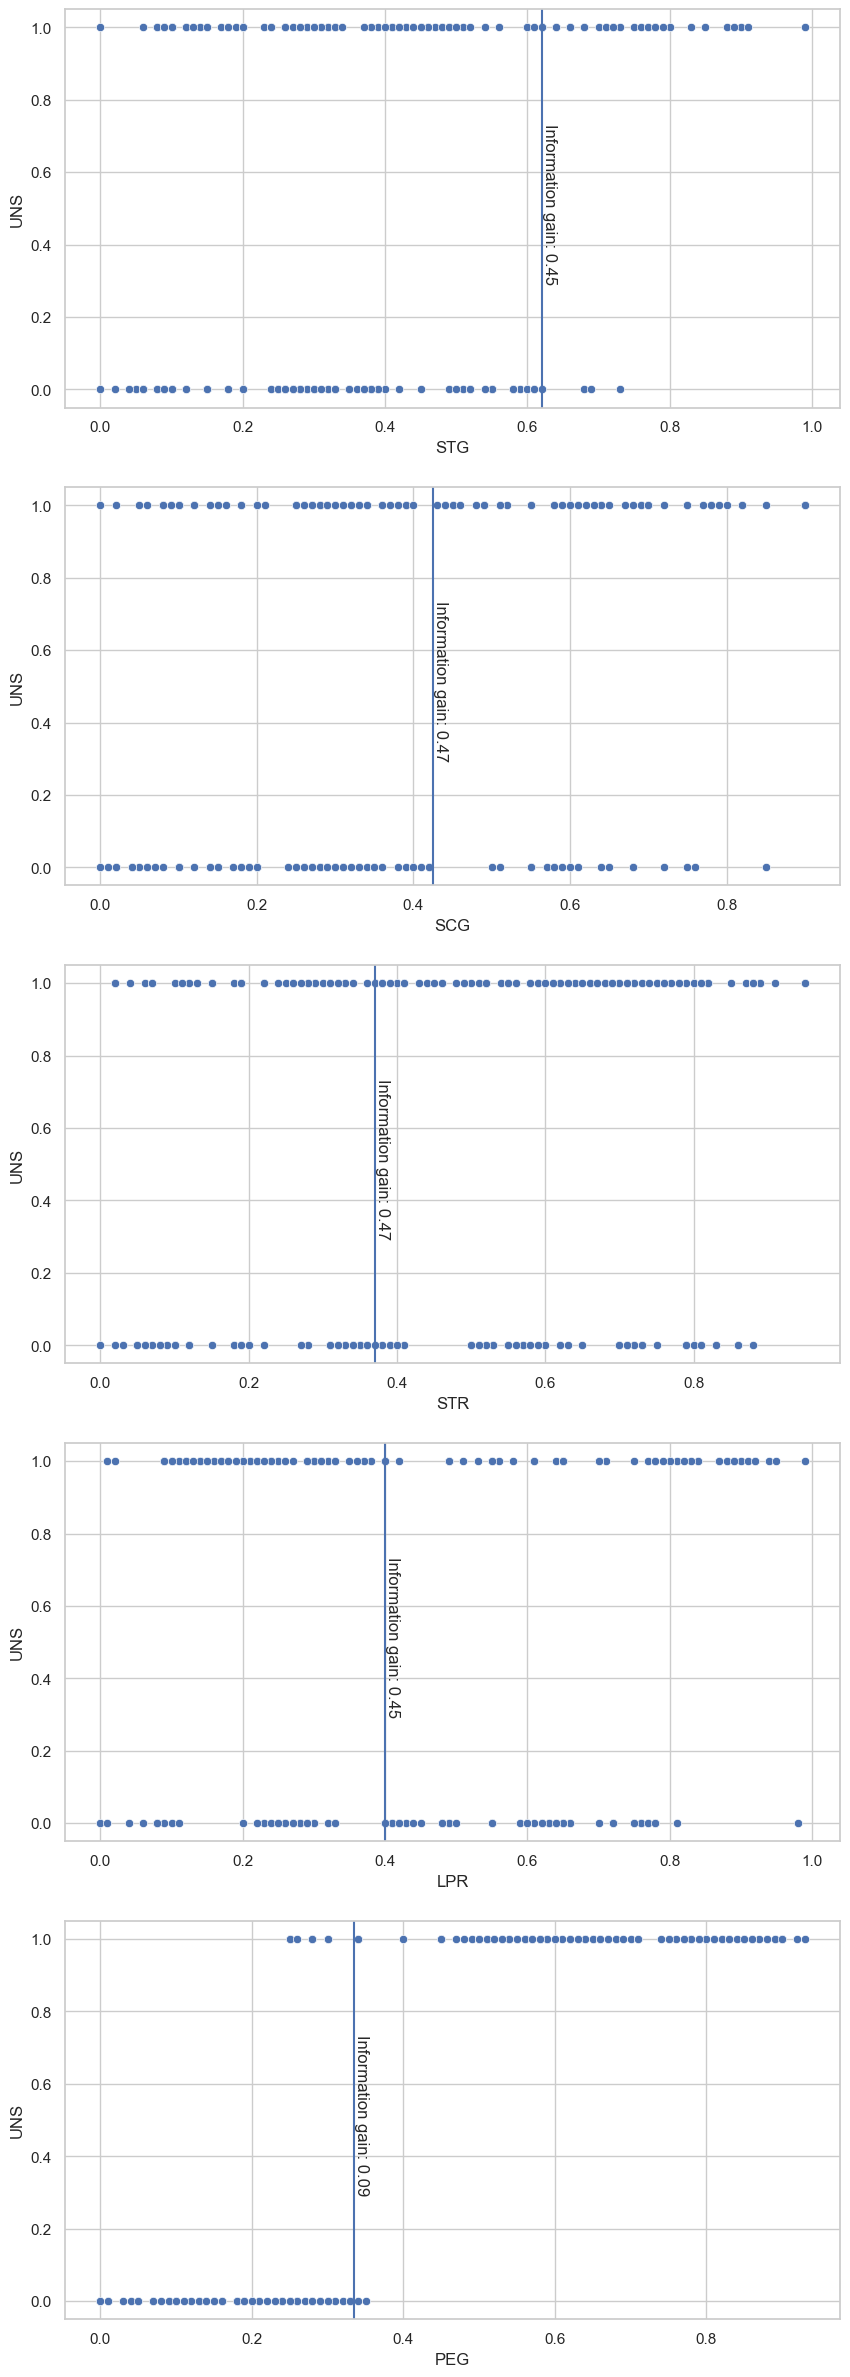

In [10]:
fig, axs = plt.subplots(len(df.columns) - 1, 1, figsize=(10, 30))

for feature_column_name, ax in zip(df.columns[:-1], axs):
    sns.scatterplot(data=df, x=feature_column_name, y="UNS", ax=ax)
    thresholds, information_gains, information_gains_best, threshold_best = find_best_split(
        np.array(df[feature_column_name]), 
        np.array(df["UNS"]),
        calculate_binary_gini
    )
    ax.axvline(threshold_best, 0, 1)
    ax.text(threshold_best, 0.3, f'Information gain: {information_gains_best:.2f}', rotation=-90)

Я хочу сказать, что я поменял минусы на сумму плюсиков, так как так удобней мне смотреть и выходит, что мы хотим, чтобы наш информативность от энтропии стремилась к 0, что значит, что у нас в листах больше элементов одного класса (константа хорошо описывает объекты в листе). Ну тут видно, что все признаки ну кал, а вот PEG мегапушка годнота хорошо пилит (если будем смотреть только в пространстве одного признака, может они вместе взаимодействуют пиздато)

### **Задание 3. (0.6 балла)**

Проанализируйтте построенные кривые. Ответьте на поставленные вопросы:
- По какому признаку нужно производить деление выборки на два поддерева? (0.15 балла)
- Согласуется ли этот результат с визуальной оценкой scatter-графиков? (0.15 балла)
- Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? (0.15 балла)
- Чем отличаются кривые для признаков, по которым деление практически невозможно? (0.15 балла)

**Ответ:**
1) По `PEG` выборка очень хорошо делится
2) А? Ну да видно
3) Чо? Чтоб вертикальная линия идеально отделяла левые значения от правых
4) Нельзя вертикальной линией отедлить хоть как-то левые значения от правых

### **Задание 4. (1.15 балла)**

В некоторых случаях необходимо анализировать код исполненного класса на предмет оптимальности и ошибок. Потренируйтесь в этом!

- Разберитесь с уже написанным кодом в классе DecisionTree модуля hw4_code_pro.py.
- Найдите ошибки в реализации метода \_fit_node.
- Напишите функцию \_predict_node.

**Примечание 1:**

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева».
- Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Примечание 2:**

- Выбор лучшего разбиения необходимо производить по критерию Джини.
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку, чтобы Джини упал
- Ответ в листе: наиболее часто встречающийся класс в листе.


1) `if np.all(sub_y != sub_y[0]):` -> `if np.all(sub_y == sub_y[0]):`
2) `sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))` -> `sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))`
3) `sub_y[split]` -> `sub_y[np.logical_not(split)]`
4) `range(1, sub_X.shape[1])` -> `range(sub_X.shape[1])`
5) `current_count / current_click` -> `current_click / current_count`
6) `if len(feature_vector) == 3:` -> `if len(feature_vector) == 1:`

### **Задание 5. (0.5 балла)**

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Для этого:

- Скачайте таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/))
- Прочитайте данные с помощью pandas
- Примените к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа.
- Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные)
- Сделайте предсказания для оставшейся половины.
- Вычислите accuracy (так как мы используем эту метрику и в силу задачи, нам не очень важно, что будет классом 1, а что — классом 0).  


У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [3]:
from hw4_code_pro import DecisionTree

In [4]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('agaricus-lepiota.data', delimiter=',', header=None)
lbe = LabelEncoder()
for i in df.columns:
    df[i]=lbe.fit_transform(df[i])


In [5]:
X, y = np.array(df.drop(columns=[0])), np.array(df[0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [16]:
dt = DecisionTree(['categorical']*X.shape[1])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9958148695224027

### **Задание 6. (бонус, 1 балл)**

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующее задание).

In [13]:
from itertools import product
from tqdm import tqdm 

max_depths = list(range(10, 51, 1))
min_samples_leafs = list(range(1, 101, 10))
min_samples_splits = list(range(1, 20, 2))

best_accuracy = 0
best_params = {
    'max_depth': None,
    'min_samples_leaf': None,
    'min_samples_split': None
}

for max_depth, min_samples_leaf, min_samples_split in tqdm(product(max_depths, min_samples_leafs, min_samples_splits), 
                                                           total=len(max_depths)*len(min_samples_leafs)*len(min_samples_splits)):
    dt = DecisionTree(
        ['categorical']*X.shape[1], 
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf, 
        min_samples_split=min_samples_split
    )
    
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split
        }

100%|██████████| 2100/2100 [37:27<00:00,  1.07s/it]


In [14]:
best_accuracy

0.9074347612013787

In [15]:
best_params

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 1}

Tik-tak-toe

In [22]:
df = pd.read_csv('tic-tac-toe.data', delimiter=',', header=None)
lbe = LabelEncoder()
for i in df.columns:
    df[i]=lbe.fit_transform(df[i])

In [24]:
X, y = np.array(df.drop(columns=[9])), np.array(df[9])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [26]:
dt = DecisionTree(['categorical']*X.shape[1])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6576200417536534

In [34]:
from itertools import product
from tqdm import tqdm 

max_depths = list(range(1, 200, 5))
min_samples_leafs = list(range(1, 101, 5))
min_samples_splits = list(range(1, 100, 5))

best_accuracy = 0
best_params = {
    'max_depth': None,
    'min_samples_leaf': None,
    'min_samples_split': None
}

for max_depth, min_samples_leaf, min_samples_split in tqdm(product(max_depths, min_samples_leafs, min_samples_splits), 
                                                           total=len(max_depths)*len(min_samples_leafs)*len(min_samples_splits)):
    dt = DecisionTree(
        ['categorical']*X.shape[1], 
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf, 
        min_samples_split=min_samples_split
    )
    
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = {
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split
        }

100%|██████████| 16000/16000 [06:06<00:00, 43.66it/s]


In [37]:
best_accuracy

0.6993736951983298

In [38]:
best_params

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1}

Неплохо.....

In [43]:
dt = DecisionTree(
    ['categorical']*X.shape[1], 
    max_depth=1000, 
    min_samples_leaf=100, 
    min_samples_split=100
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.6993736951983298

Пон.

### **Задание 7. (2 балла)**

**1. Загрузите следующие наборы данных** (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**2. Закодируйте категориальные признаки, использовав LabelEncoder.** С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации:**
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами.

## Mushrooms
### Categorical

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('agaricus-lepiota.data', delimiter=',', header=None)
lbe = LabelEncoder()
for i in df.columns:
    df[i]=lbe.fit_transform(df[i])
X, y = np.array(df.drop(columns=[0])), np.array(df[0])

In [7]:
dt = DecisionTree(
    ['categorical']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [8]:
print(np.mean(accuracies))
print(accuracies)

0.988557401583868
[0.92742927 0.99507995 0.99753998 0.99384994 0.99753695 1.
 0.97906404 1.         1.         0.99507389]


### Real

In [9]:
dt = DecisionTree(
    ['real']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [10]:
print(np.mean(accuracies))
print(accuracies)

0.9921226195020569
[0.9704797  0.99384994 1.         1.         0.99507389 0.99876847
 0.98522167 0.99137931 0.99876847 0.98768473]


### OneHotEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('agaricus-lepiota.data', delimiter=',', header=None)
ohe = OneHotEncoder(sparse_output=False, drop='first')
df = ohe.fit_transform(df)
X, y = df[:, 1:], df[:, 0]

In [17]:
dt = DecisionTree(
    ['real']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [18]:
print(np.mean(accuracies))
print(accuracies)

0.9618549251994983
[0.9200492  0.90282903 0.92250923 0.99261993 0.99384236 0.99261084
 0.93842365 0.9864532  0.99261084 0.97660099]


### Sklearn

In [23]:
df = pd.read_csv('agaricus-lepiota.data', delimiter=',', header=None)
lbe = LabelEncoder()
for i in df.columns:
    df[i]=lbe.fit_transform(df[i])
X, y = np.array(df.drop(columns=[0])), np.array(df[0])

In [24]:
dt = DecisionTreeClassifier()
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [25]:
print(np.mean(accuracies))
print(accuracies)

0.9611225225552747
[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.92610837 1.        ]


In [27]:
pd.DataFrame({
    'Categorical':[0.9886],
    'Real': [0.9921],
    'OneHotEncoder': [0.9619],
    'Sklearn': [0.9611]
})

,Categorical,Real,OneHotEncoder,Sklearn
0,0.9886,0.9921,0.9619,0.9611


## Tic-tac-toe
### Categorical

In [28]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('tic-tac-toe.data', delimiter=',', header=None)
lbe = LabelEncoder()
for i in df.columns:
    df[i]=lbe.fit_transform(df[i])
X, y = np.array(df.drop(columns=[9])), np.array(df[9])

In [29]:
dt = DecisionTree(
    ['categorical']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [30]:
print(np.mean(accuracies))
print(accuracies)

0.5356688596491228
[0.79166667 0.76041667 0.77083333 0.61458333 0.78125    0.80208333
 0.54166667 0.05208333 0.03157895 0.21052632]


### Real

In [31]:
dt = DecisionTree(
    ['real']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [32]:
print(np.mean(accuracies))
print(accuracies)

0.46392543859649127
[0.63541667 0.57291667 0.5625     0.39583333 0.625      0.73958333
 0.55208333 0.1875     0.09473684 0.27368421]


### OneHotEncoder

In [33]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('agaricus-lepiota.data', delimiter=',', header=None)
ohe = OneHotEncoder(sparse_output=False, drop='first')
df = ohe.fit_transform(df)
X, y = df[:, :-1], df[:, -1]

In [34]:
dt = DecisionTree(
    ['real']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [35]:
print(np.mean(accuracies))
print(accuracies)

0.9945812807881774
[1.         1.         1.         1.         1.         1.
 0.95320197 0.99384236 1.         0.99876847]


### Sklearn

In [38]:
df = pd.read_csv('tic-tac-toe.data', delimiter=',', header=None)
lbe = LabelEncoder()
for i in df.columns:
    df[i]=lbe.fit_transform(df[i])
X, y = np.array(df.drop(columns=[9])), np.array(df[9])

In [39]:
dt = DecisionTreeClassifier()
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [40]:
print(np.mean(accuracies))
print(accuracies)

0.7893969298245613
[0.78125    0.72916667 0.53125    0.83333333 0.78125    0.72916667
 0.86458333 0.82291667 0.91578947 0.90526316]


In [42]:
pd.DataFrame({
    'Categorical':[0.5357],
    'Real': [0.4639],
    'OneHotEncoder': [0.9946],
    'Sklearn': [0.7894]
})

,Categorical,Real,OneHotEncoder,Sklearn
0,0.5357,0.4639,0.9946,0.7894


## Car
### Categorical

In [32]:
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('car.data', delimiter=',', header=None)
X, y = np.array(df.drop(columns=[6])), np.array(df[6])
y[(y == 'unacc')|(y == 'acc')] = 0
y[(y == 'good')|(y == 'vgood')] = 1
y = y.astype(int)
lbe = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i]=lbe.fit_transform(X[:, i])

In [56]:
dt = DecisionTree(
    ['categorical']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [57]:
print(np.mean(accuracies))
print(accuracies)

0.9091107675762871
[0.97109827 0.87283237 0.9132948  0.9132948  0.87283237 0.97109827
 0.82080925 0.99421965 0.87790698 0.88372093]


### Real

In [58]:
dt = DecisionTree(
    ['real']*X.shape[1],
    max_depth=1
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [59]:
print(np.mean(accuracies))
print(accuracies)

0.922257695926872
[1.         1.         1.         1.         1.         1.
 0.9017341  0.8150289  0.86627907 0.63953488]


### OneHotEncoder

In [41]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('car.data', delimiter=',', header=None)
X, y = np.array(df.drop(columns=[6])), np.array(df[6])
y[(y == 'unacc')|(y == 'acc')] = 0
y[(y == 'good')|(y == 'vgood')] = 1
y = y.astype(int)
ohe = OneHotEncoder(sparse_output=False, drop='first')
X = ohe.fit_transform(X)

In [52]:
dt = DecisionTree(
    ['real']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [53]:
print(np.mean(accuracies))
print(accuracies)

0.9257393466863826
[1.         1.         1.         1.         1.         1.
 0.9132948  0.8150289  0.86627907 0.6627907 ]


### Sklearn

In [60]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('car.data', delimiter=',', header=None)
X, y = np.array(df.drop(columns=[6])), np.array(df[6])
y[(y == 'unacc')|(y == 'acc')] = 0
y[(y == 'good')|(y == 'vgood')] = 1
y = y.astype(int)
lbe = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i]=lbe.fit_transform(X[:, i])

In [61]:
dt = DecisionTreeClassifier()
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [62]:
print(np.mean(accuracies))
print(accuracies)

0.9427073531388628
[0.92485549 0.95953757 0.92485549 0.98265896 0.96531792 0.98843931
 0.91907514 0.87861272 0.93023256 0.95348837]


In [63]:
pd.DataFrame({
    'Categorical':[0.9091],
    'Real': [0.9223],
    'OneHotEncoder': [0.9257],
    'Sklearn': [0.9427]
})

,Categorical,Real,OneHotEncoder,Sklearn
0,0.9091,0.9223,0.9257,0.9427


## Nursery
### Categorical

In [66]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('nursery.data', delimiter=',', header=None)
X, y = np.array(df.drop(columns=[8])), np.array(df[8])
y[(y == 'not_recom')|(y == 'recommend')] = 0
y[(y == 'very_recom')|(y == 'priority')|(y == 'spec_prior')] = 1
y = y.astype(int)
lbe = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i]=lbe.fit_transform(X[:, i])

In [67]:
dt = DecisionTree(
    ['categorical']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [68]:
print(np.mean(accuracies))
print(accuracies)

0.9998456790123458
[0.99845679 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


### Real

In [69]:
dt = DecisionTree(
    ['real']*X.shape[1],
    max_depth=1
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [70]:
print(np.mean(accuracies))
print(accuracies)

0.36651234567901236
[0.66512346 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]


### OneHotEncoder

In [71]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('nursery.data', delimiter=',', header=None)
X, y = np.array(df.drop(columns=[8])), np.array(df[8])
y[(y == 'not_recom')|(y == 'recommend')] = 0
y[(y == 'very_recom')|(y == 'priority')|(y == 'spec_prior')] = 1
y = y.astype(int)
ohe = OneHotEncoder(sparse_output=False, drop='first')
X = ohe.fit_transform(X)

In [72]:
dt = DecisionTree(
    ['real']*X.shape[1]
)
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [73]:
print(np.mean(accuracies))
print(accuracies)

0.9998456790123458
[0.99845679 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


### Sklearn

In [74]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('nursery.data', delimiter=',', header=None)
X, y = np.array(df.drop(columns=[8])), np.array(df[8])
y[(y == 'not_recom')|(y == 'recommend')] = 0
y[(y == 'very_recom')|(y == 'priority')|(y == 'spec_prior')] = 1
y = y.astype(int)
lbe = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i]=lbe.fit_transform(X[:, i])

In [75]:
dt = DecisionTreeClassifier()
accuracies = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

In [76]:
print(np.mean(accuracies))
print(accuracies)

0.9996913580246914
[0.99845679 1.         0.99845679 1.         1.         1.
 1.         1.         1.         1.        ]


In [77]:
pd.DataFrame({
    'Categorical':[0.9998],
    'Real': [0.3665],
    'OneHotEncoder': [0.9998],
    'Sklearn': [0.9996]
})

,Categorical,Real,OneHotEncoder,Sklearn
0,0.9998,0.3665,0.9998,0.9996


## Результаты

In [82]:
pd.DataFrame({
'Mushrooms':    {
        'Categorical': 0.9886,
        'Real': 0.9921,
        'OneHotEncoder': 0.9619,
        'Sklearn': 0.9611
    },
'Tic-tac-toe':    {
        'Categorical':0.5357,
        'Real': 0.4639,
        'OneHotEncoder': 0.9946,
        'Sklearn': 0.7894
    },
'Car':    {
        'Categorical':0.9091,
        'Real': 0.9223,
        'OneHotEncoder': 0.9257,
        'Sklearn': 0.9427
    },
'Nursery':    {
        'Categorical': 0.9998,
        'Real': 0.3665,
        'OneHotEncoder': 0.9998,
        'Sklearn': 0.9996
    }
}).T

,Categorical,Real,OneHotEncoder,Sklearn
Mushrooms,0.9886,0.9921,0.9619,0.9611
Tic-tac-toe,0.5357,0.4639,0.9946,0.7894
Car,0.9091,0.9223,0.9257,0.9427
Nursery,0.9998,0.3665,0.9998,0.9996


### **Задание 8. (0.5 балла)**

Проанализируйте результаты эксперимента. Ответьте на вопросы:
- Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.
- Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
- Если случайность есть, то можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

1) Видно, что нет, у кого-то одни в топе, а у кого-то другие. Особо видно по tic-tac-toe
2) Каво
3) Каво

# **2. Задача бинарной классификации реализованным деревом (4 балла)**

Всего за эту часть можно получить 4 балла.

В этом разделе вам необходимо решить задачу бинарной классификации самописным деревом и лесом из sklearn, а после интерпретировать лучшие модели. А именно:

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT и RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Познакомимся с задачей: постановка**

У вас есть данные о полетах, обладающие следущими характеристиками:
- Для **каждого** клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета.
- Для **некоторых** клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied).

По данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, **для которых ответ неизвестен.**

### **Получение данных:**

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

In [17]:
!wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" --output-document root.crt

--2025-01-18 13:04:25--  https://storage.yandexcloud.net/cloud-certs/CA.pem
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3,5K) [application/x-x509-ca-cert]
Saving to: 'root.crt'

     0K ...                                                   100% 2,38G=0s

2025-01-18 13:04:25 (2,38 GB/s) - 'root.crt' saved [3579/3579]



In [19]:
!chmod

"chmod" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [18]:
# !wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" --output-document ~/.postgresql/root.crt && \
!chmod 0600 ~/.postgresql/root.crt

"chmod" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [12]:
!mkdir ~/.postgresql

�訡�� � ᨭ⠪�� �������.


In [11]:
!mkdir -p ~/.postgresql

�訡�� � ᨭ⠪�� �������.


### **Задание 9. Получение данных (0.5 балла)**

- Подключитесь к БД при помощи `psycopg2.connect()`
- Напишите SQL-запрос, объединяющий 3 нужные таблицы в одну
- Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'.

Список столбцов таблиц добудьте самостоятельно.


**Примечание:**
 Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

##### **Параметры соединения:**
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write```
```

##### **Схема БД**

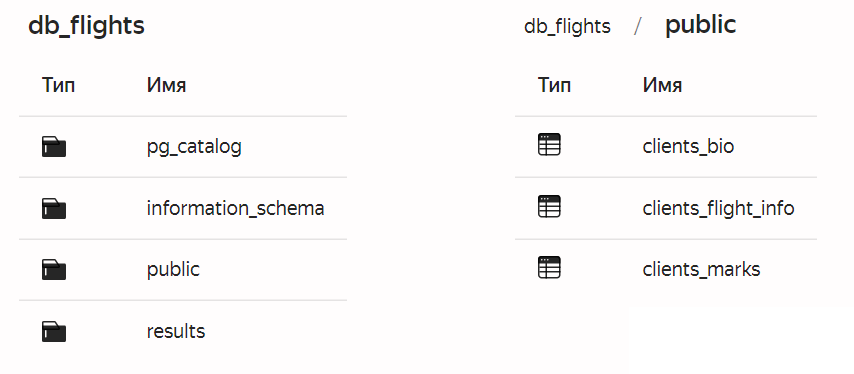

In [4]:
connection_parameters = {
    "host": "rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net",
    "port": 6432,
    "dbname": "db_flights",
    "user": "mlhs_student",
    "password": "mlhs_student",
    "sslmode": "verify-full",
    "target_session_attrs": "read-write"
}

with psycopg2.connect(**connection_parameters) as conn:
    with conn.cursor() as cur:
        # Выполните ваш SQL-запрос
        sql_query = """
        SELECT clb.*, clfi.*, clm.*
        FROM clients_bio as clb
        JOIN clients_flight_info as clfi
        USING (id)
        JOIN clients_marks as clm
        USING (id)
        """  # Измените SQL запрос в зависимости от ваших требований
        
        cur.execute(sql_query)
        
        # Передайте данные в pandas DataFrame
        columns = [desc[0] for desc in cur.description]
        data = cur.fetchall()
        df = pd.DataFrame(data, columns=columns)
        df = df.loc[:,~df.columns.duplicated()].copy()
        
        # Установите 'id' в качестве индекса
        df.set_index('id', inplace=True)
        df.sort_index(inplace=True)

In [5]:
assert df.shape == (129_549, 23)

Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука.

In [6]:
df_train = df[df.satisfaction != '-']

df_train.head()

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [7]:
assert df_train.shape == (103_644, 23)

In [8]:
df_test = df[df.satisfaction == '-'].drop('satisfaction', axis=1)
df_test.head()

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
id,,,,,,,,,,,,,,,,,,,,,
17,Female,48.0,Loyal Customer,Personal Travel,Eco,821.0,0.0,0.0,2.0,3.0,...,1.0,5.0,1.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0
20,Female,42.0,Loyal Customer,Personal Travel,Eco,821.0,4.0,0.0,3.0,3.0,...,1.0,3.0,4.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0
35,Male,39.0,Loyal Customer,Business travel,Business,1672.0,23.0,17.0,2.0,2.0,...,5.0,4.0,5.0,3.0,3.0,4.0,5.0,5.0,3.0,5.0
44,Male,51.0,Loyal Customer,Business travel,Business,2077.0,0.0,1.0,4.0,1.0,...,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
49,Male,20.0,disloyal Customer,Business travel,Eco,108.0,0.0,29.0,4.0,5.0,...,5.0,4.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0


In [9]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид.

In [108]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction, test_size=0.3, random_state=42)

In [109]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)

### **Задание 10 (0.25 балла)**

- Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)
- Заполните пропуски в данных наиболее часто встречающимся значением.
Помните про правильность заполнения.
- Выведите основные статистики по числовым и категориальным столбцам таблицы
- Сделайте **текстовый** вывод о распределениях значений признаков

In [110]:
real_columns = [
    'age', 'Flight Distance', 'Departure Delay in Minutes', 
    'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'cleanliness'
]
cat_columns = ['gender', 'Customer Type', 'Type of Travel', 'class']

In [111]:
X_train[real_columns] = X_train[real_columns].astype(float)
X_val[real_columns] = X_val[real_columns].astype(float)

In [112]:
most_common_values = {}
for column in X_train.columns:
    most_common_values[column] = X_train[column].mode()[0]

In [113]:
X_train = X_train.fillna(value=most_common_values)
X_val = X_val.fillna(value=most_common_values)

In [114]:
X_train.describe()

,age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
count,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000
mean,40.083666,1338.222261,15.642591,16.381116,2.735603,3.063556,2.760744,2.981792,3.208132,3.259821,3.444328,3.362660,3.382977,3.355093,3.633770,3.311647,3.644383,3.289690
std,20.355546,4838.640464,67.829985,100.546087,1.366913,1.556199,1.416293,1.302569,1.357203,1.393320,1.344373,1.368691,1.334893,1.371754,1.234864,1.311884,1.215434,1.345367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,842.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,612.000000,328510.000000,9282.000000,14006.000000,45.000000,45.000000,36.000000,36.000000,45.000000,40.000000,36.000000,40.000000,45.000000,40.000000,40.000000,45.000000,36.000000,45.000000


In [115]:
X_val.describe()

,age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
count,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000
mean,39.991220,1294.994436,16.172734,17.489741,2.728050,3.068245,2.759600,2.980286,3.197980,3.244870,3.441596,3.358076,3.394867,3.361388,3.640574,3.300862,3.645623,3.290249
std,20.276924,4184.532413,86.526115,126.504409,1.336778,1.549359,1.435678,1.323412,1.342022,1.366817,1.360424,1.340055,1.334363,1.352583,1.207736,1.277959,1.203722,1.340539
min,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,416.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,852.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,528.000000,379620.000000,11011.000000,11256.000000,21.000000,32.000000,45.000000,32.000000,36.000000,28.000000,45.000000,25.000000,45.000000,35.000000,40.000000,36.000000,28.000000,32.000000


In [116]:
X_train.describe(include='object')

,gender,Customer Type,Type of Travel,class
count,72550,72550,72550,72550
unique,2,3,3,4
top,Female,Loyal Customer,Business travel,Business
freq,36738,59314,49992,34574


In [117]:
X_val.describe(include='object')

,gender,Customer Type,Type of Travel,class
count,31094,31094,31094,31094
unique,2,3,3,4
top,Female,Loyal Customer,Business travel,Business
freq,15852,25341,21431,14913


Бегло если смотреть, то age 612 это прикол)))) и cleanliness, если по пятибалке, то 45 многовато надо вычистить

Такие же приколы в вале, но тут чистить не понятно... В том плане, что тогда моя валидационная выборка будет отличаться от чужой и сравниться тяжело, но в проде, наверное, надо накричать на бекендеров чо эт у них такие значения просовывают

По категориальным признакам не знаю, что сказать. Ну крутые....

### **Задание 11. (2 балла)**

Осуществите предобработку датасета для обучения **полностью самостоятельно**, на основе вашего опыта из прошлых дз и изученной теории. Обязательно **комментируйте** каждое действие.

**Примечание:**

В данном задании ваша задача в том числе убедить ревьюера в достаточности предобработки.

### Закодируем сразу категориальные фичи

In [124]:
from sklearn.preprocessing import LabelEncoder
lbes = []
for i in cat_columns:
    lbe = LabelEncoder()
    
    lbe.fit(X_train[i])
    X_val[i] = lbe.transform(X_val[i])
    X_train[i] = lbe.transform(X_train[i])
    lbes += [lbe]
    

### Честно посмотрим на распределение каждого признака с действительными значениями

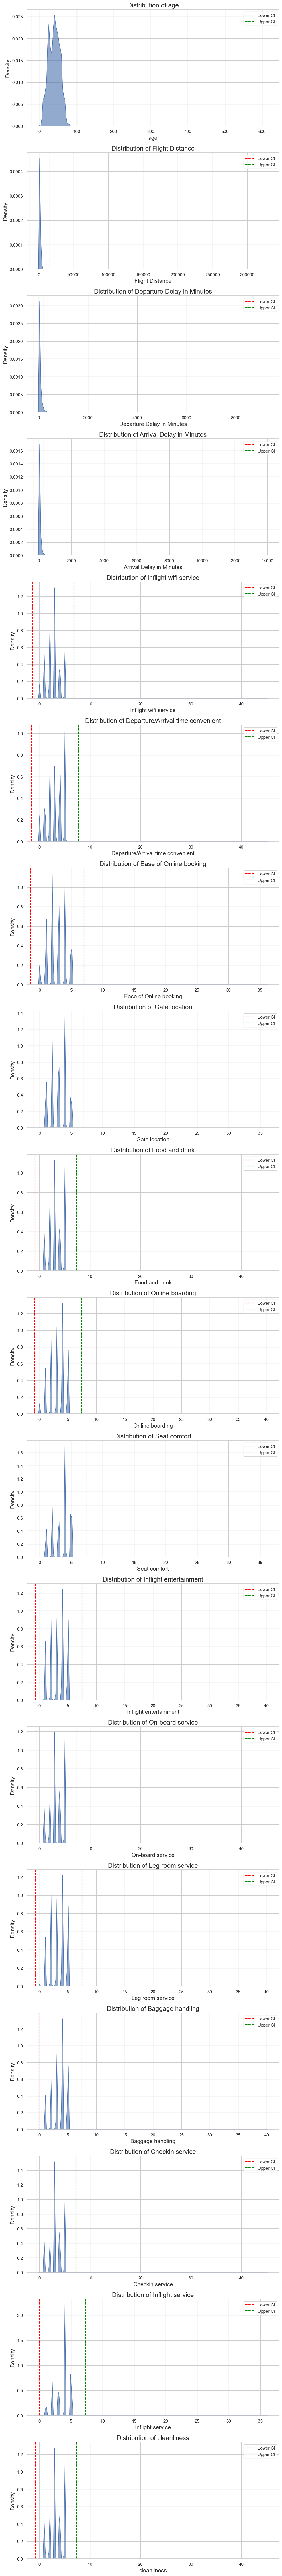

In [21]:
sns.set(style="whitegrid")  # Настройка стиля

# Определение размера и сетки для подграфиков
num_features = len(real_columns)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

for i, column in enumerate(real_columns):
    ax = axes[i] if num_features > 1 else axes
    
    # Выборочная функция kdeplot для визуализации распределения
    sns.kdeplot(
        data=X_train[column], 
        fill=True, 
        ax=ax, 
        bw_adjust=0.5,  # Корректировка ширины полосы
        alpha=0.6
    )
    
    ax.set_title(f'Distribution of {column}', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    # Добавление доверительных интервалов (например, стандартное отклонение)
    lower_bound = X_train[column].mean() - 3 * X_train[column].std()
    upper_bound = X_train[column].mean() + 3 * X_train[column].std()

    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower CI')
    ax.axvline(upper_bound, color='green', linestyle='--', label='Upper CI')
    ax.legend()

plt.tight_layout()
plt.show()

Я в целом хотел бы все обрезать, что входит в промежутки, там все трясется основное 

In [118]:
print(f'Всего значений {X_train.shape[0]}')
for i, column in enumerate(real_columns):
    
    # Добавление доверительных интервалов (например, стандартное отклонение)
    lower_bound = X_train[column].mean() - 3 * X_train[column].std()
    upper_bound = X_train[column].mean() + 3 * X_train[column].std()
    print(f'Доля 3*sigma внутри {column}: {np.sum((X_train[column] < upper_bound)&(X_train[column] > lower_bound)) / X_train.shape[0] * 100: .02f}%')

Всего значений 72550
Доля 3*sigma внутри age:  99.69%
Доля 3*sigma внутри Flight Distance:  99.84%
Доля 3*sigma внутри Departure Delay in Minutes:  99.39%
Доля 3*sigma внутри Arrival Delay in Minutes:  99.76%
Доля 3*sigma внутри Inflight wifi service:  99.98%
Доля 3*sigma внутри Departure/Arrival time convenient:  99.98%
Доля 3*sigma внутри Ease of Online booking:  99.98%
Доля 3*sigma внутри Gate location:  99.98%
Доля 3*sigma внутри Food and drink:  99.98%
Доля 3*sigma внутри Online boarding:  99.97%
Доля 3*sigma внутри Seat comfort:  99.97%
Доля 3*sigma внутри Inflight entertainment:  99.98%
Доля 3*sigma внутри On-board service:  99.98%
Доля 3*sigma внутри Leg room service:  99.97%
Доля 3*sigma внутри Baggage handling:  99.98%
Доля 3*sigma внутри Checkin service:  99.97%
Доля 3*sigma внутри Inflight service:  99.96%
Доля 3*sigma внутри cleanliness:  99.98%


In [119]:
mask = [True]*X_train.shape[0]
for i, column in enumerate(real_columns):
    
    # Добавление доверительных интервалов (например, стандартное отклонение)
    lower_bound = X_train[column].mean() - 3 * X_train[column].std()
    upper_bound = X_train[column].mean() + 3 * X_train[column].std()
    mask = mask & (X_train[column] < upper_bound)&(X_train[column] > lower_bound)

In [120]:
print(f'Оставим: {mask.sum() / mask.shape[0] * 100:.02f}%')

Оставим: 98.53%


In [121]:
X_train = X_train[mask]
y_train = y_train[mask]

### Закодируем еще таргет

In [122]:
y_mapper = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}

y_train = y_train.apply(y_mapper.get)
y_val = y_val.apply(y_mapper.get)

### **Задание 12. (0.25 балла)**

- Обучите самописное дерево и Random Forest с базовыми гиперпараметрами. Выведите `f1-score`.

In [26]:
from sklearn.metrics import f1_score

In [27]:
feature_types = ['real' if column in real_columns else 'categorical' for column in X_train.columns]

In [28]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

In [29]:
X_val_np = np.array(X_val)
y_val_np = np.array(y_val)

In [158]:
dt = DecisionTree(
    feature_types
)

dt.fit(X_train_np, y_train_np)
y_pred = dt.predict(X_val_np)
f1_score(y_val_np, y_pred)

0.6120001471507928

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_np, y_train_np)
y_pred = rf.predict(X_val_np)
f1_score(y_val_np, y_pred)

0.9538520068480122

ВААААУ ЧТООООО КОМПОЗИЦИЯ ДЕРЕВЬЕВ ЛУЧШЕ ПЕРЕОБУЧЕННОГО 1 ДЕРЕВА!!!!

Ну типа не понял сути задания сравнить тут же прям изначально чувствуется разнос

### **Задание 13. (0.4 баллa)**

- Попробуйте подобрать оптимальные гиперпараметры леса и дерева (если реализовали их в бонусе), используя [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).
- Сравните качество полученных моделей и выберите лучшую. Лучшую модель сохраните в pickle.

**Важно:**  

Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

distributions = {
    'max_depth': randint(low=0, high=100), 
    'min_samples_split': randint(low=0, high=100), 
    'min_samples_leaf': randint(low=0, high=100)
}

dt = RandomForestClassifier()

clf = RandomizedSearchCV(dt, distributions, scoring='f1', random_state=42)
search = clf.fit(X_train_np, y_train_np)

In [173]:
search.best_params_

{'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 21}

In [174]:
y_pred = clf.predict(X_val_np)
f1_score(y_val_np, y_pred)

0.9507200121585166

In [179]:
rf = RandomForestClassifier(**search.best_params_)
rf.fit(X_train_np, y_train_np)
y_pred = rf.predict(X_val_np)
f1_score(y_val_np, y_pred)

0.9506102429565416

In [180]:
import pickle
with open("best_rf.pkl", "wb") as f:
    pickle.dump(rf, f)

Ладно

In [175]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = {
    'max_depth': uniform(loc=0, scale=100), 
    'min_samples_split': uniform(loc=0, scale=100), 
    'min_samples_leaf': uniform(loc=0, scale=100)
}

dt = DecisionTree(
    feature_types
)

clf = RandomizedSearchCV(dt, distributions, scoring='f1', random_state=42)
search = clf.fit(X_train_np, y_train_np)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'fit'


капец.... хз не могу починить

### **Задание 14. Анализ моделей (0.1 балла)**

- Отобразите`feature_importances_` вашего лучшего случайного леса;
- Проанализируйте, какие признаки оказались важными?

In [195]:
importances = rf.feature_importances_
sums = np.sum(importances)
for i in range(len(importances)):
    importances[i] = importances[i] / sums * 100

In [196]:
importance_feature_name =  sorted(list(zip(importances, X_train.columns)), key=lambda x: -x[0])

In [198]:
for importance, column in importance_feature_name:
    print(f'Важность фичи {column} = {importance:0.2f}')

Важность фичи Inflight wifi service = 16.60
Важность фичи Online boarding = 16.18
Важность фичи class = 11.14
Важность фичи Type of Travel = 10.63
Важность фичи Inflight entertainment = 5.57
Важность фичи Seat comfort = 4.90
Важность фичи Leg room service = 4.26
Важность фичи Ease of Online booking = 4.21
Важность фичи Customer Type = 4.05
Важность фичи Flight Distance = 3.29
Важность фичи On-board service = 2.91
Важность фичи cleanliness = 2.54
Важность фичи Baggage handling = 2.32
Важность фичи age = 2.15
Важность фичи Checkin service = 2.11
Важность фичи Inflight service = 2.03
Важность фичи Departure/Arrival time convenient = 1.56
Важность фичи Gate location = 1.19
Важность фичи Food and drink = 0.96
Важность фичи Arrival Delay in Minutes = 0.72
Важность фичи Departure Delay in Minutes = 0.50
Важность фичи gender = 0.16


Самыми важными признаками оказались:
* Вайфай в самолете ору)
* Можно ли зарегаться онлайн
* Класс: бизнес, эконом и тд
* Тип путешествия, ну там походу придирчивость роляет, может бизнесовые более уставшие и раздраженные 
* Качество обслуживания (??) ну может бытть

### **Задание 15. (0.25 балла)**
- Интерпретируйте важности признаков с помощью SHAP.
- Опишите полученый график

**Важно:** Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

**Вам может помочь:** [Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

In [62]:
explainer = shap.Explainer(rf)

In [63]:
X_val_sample = X_val.sample(1000)
shap_values = explainer(X_val_sample)

In [73]:
X_val

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
id,,,,,,,,,,,,,,,,,,,,,
24136,1,49.0,0,0,0,2000.0,64.0,56.0,1.0,1.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
73950,1,70.0,0,0,0,830.0,0.0,0.0,3.0,3.0,...,5.0,5.0,5.0,5.0,2.0,1.0,2.0,5.0,1.0,5.0
97385,1,40.0,0,1,1,347.0,0.0,0.0,3.0,4.0,...,5.0,3.0,5.0,5.0,3.0,2.0,5.0,5.0,4.0,5.0
34168,0,25.0,0,0,0,2606.0,0.0,5.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,4.0,3.0,1.0,3.0,2.0
52165,1,37.0,0,0,1,509.0,0.0,3.0,4.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108651,0,47.0,0,0,0,1747.0,29.0,34.0,4.0,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
124219,1,50.0,0,0,0,2176.0,84.0,101.0,1.0,1.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0
42723,0,55.0,0,1,1,1042.0,0.0,9.0,2.0,3.0,...,3.0,3.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0


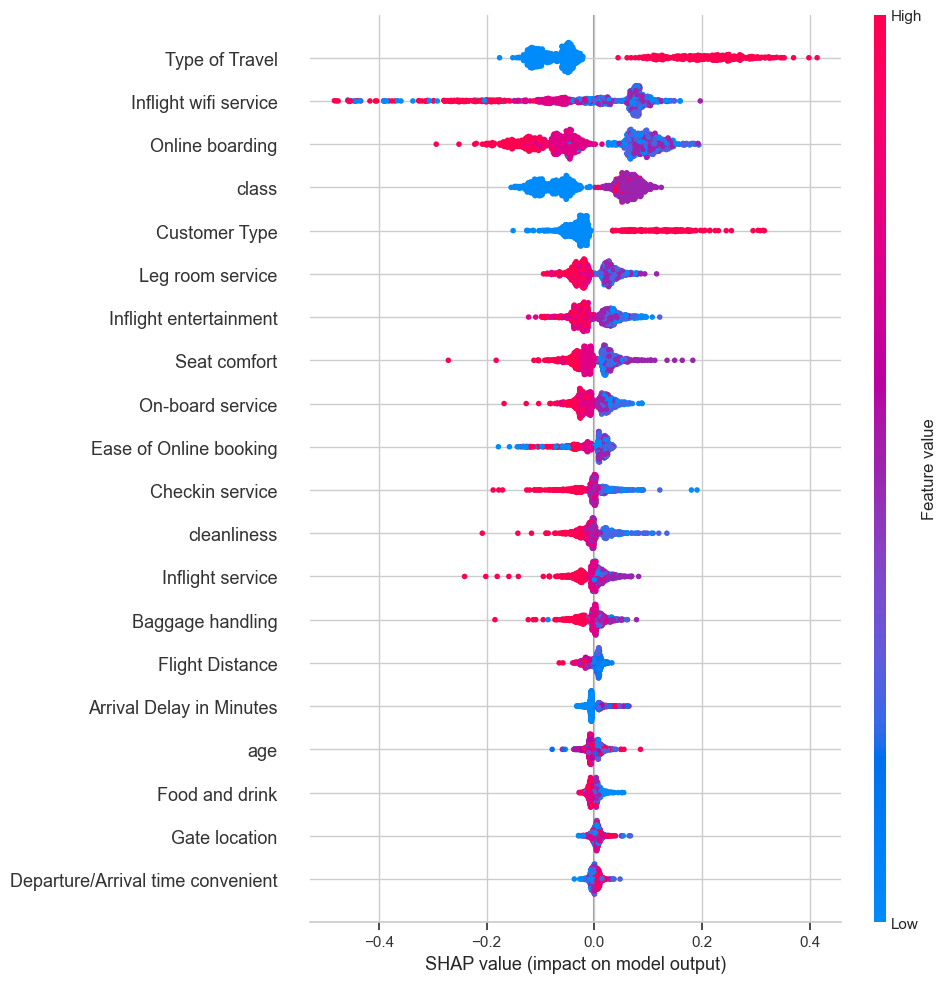

In [92]:
shap.summary_plot(shap_values[:, :, 0], X_val_sample, plot_size=(10, 10))

Ну тут кароче похожий топ немного, но в итоге Type of Travel либо сильно увеличивает среднее предскзаание модели, либо его роняет, из-за чего он выделился здесь

### **Задание 16. (0.25 балла)**

- Интерпретируйте важности признаков для одного прогноза с помощью LIME;
- Опишите полученный график для выбранного наблюдения

In [125]:
# Инициализация Explainer объекта для LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), 
    feature_names=X_train.columns, 
    class_names=[0, 1], 
    mode='classification'
)

# Выбор одного наблюдения из тестового набора данных
i = 1  # индекс наблюдения, которое вы хотите интерпретировать
observation = np.array(X_val.iloc[i])

# Получение объяснений для одного наблюдения
exp = explainer.explain_instance(observation, rf.predict_proba, num_features=len(X_train.columns))

# Визуализация результатов
exp.show_in_notebook(show_all=False)

In [137]:
lbes[2].classes_

array(['Business travel', 'Personal Travel', 'nan'], dtype=object)

Ну type of travel у него Business travel, значит все же менее привередливые, но мейби там есть корреляция с классом (по работе летают на бизнессе)

In [143]:
df[df['Type of Travel'] == 'Personal Travel']['class'].value_counts()

class
Eco         32855
Eco Plus     4493
Business     2662
nan            33
Name: count, dtype: int64

In [142]:
df[df['Type of Travel'] == 'Business travel']['class'].value_counts()

class
Business    59226
Eco         25216
Eco Plus     4880
nan            83
Name: count, dtype: int64

ну да)))

А так в целом что в топе было то и влияет: возможность онлайн брони, тип поездки (который класс скорее поясняет), customer type просто лоял дизлоял тож понятно

## Котобонус!

0.25 балла

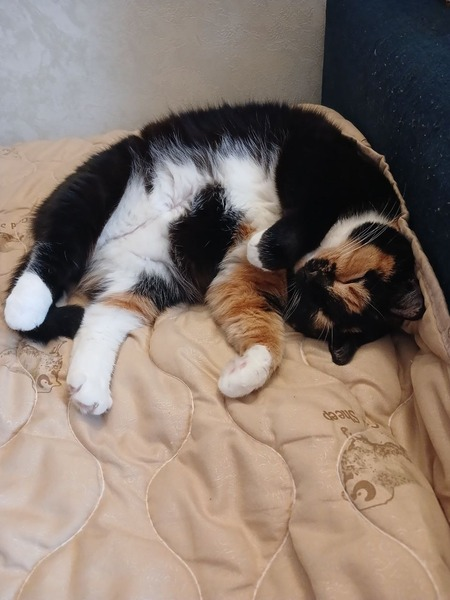

Очень хорошего человека

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?

Устал я делать это дз, босс.... 

Вот зачем мне 4 датасета гонять.... 

cross_val_score с реализованными методами get_params не работает, надо бы дописать.

странные сравнения дерева и рандом фореста

кота не угадать

первая часть была интересна, пока не надо было гонять кучу датасетов

вторая часть была просто норм